In [93]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from wordcloud import WordCloud
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [94]:
base_url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=65963&target=after&page='
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36'}

comments = []

for i in range(1, 51) :
    full_url = base_url + str(i)
    
    page = requests.get(full_url, headers=headers).content
    
    soup = BeautifulSoup(page, 'lxml')
    
    comment_all = soup.find_all('td', class_='title')
    
    for j in comment_all :
        temp_comment = j.contents[6].strip()
        comments.append(temp_comment)
        
    time.sleep(1)

In [95]:
len(comments)

500

In [96]:
dat_df = pd.DataFrame({'comments' : comments})
dat_df.to_csv('기담_리뷰_210617.csv', index=False)

dat_df.head()

,comments
0,우리집 강아지 껴안고 봤는데도 수ㅣ벌 엄마 귀신 개무서워 진짜
1,공포영화 좋아해서 웬만한거 다 봤는데 이렇게 세련되고 탄탄한 스토리의 공포영화는 처...
2,영화란 영화는 거의 다 영화관에서 보는 공포영화 좋아하는 친구가 엄마 귀신 나올 때...
3,07년도 고등학생때 보고 서른이 넘는 지금 다시 보니 아주 슬픈내용들로 가득하네요 ...
4,약간 퍼즐같은 느낌이라 솔직히 이런 류 영화그다지 좋아하지 않는데 매력있는 작품이라 느낌


In [97]:
with open('기담_리뷰_210617.csv', 'r', encoding='utf-8') as f :
    comment = f.read()

In [98]:
rc('font', family='NanumGothic')

(-0.5, 399.5, 199.5, -0.5)

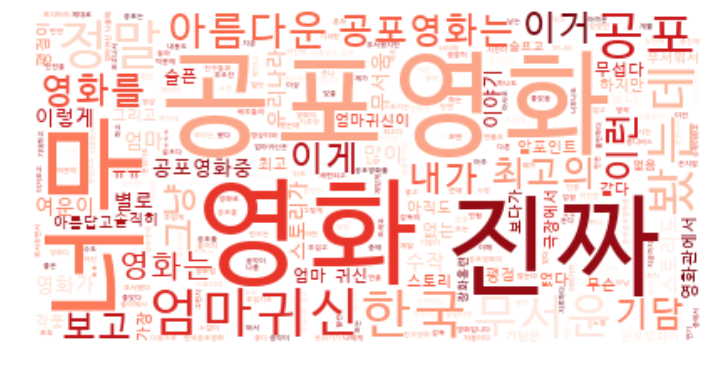

In [99]:
wcloud = WordCloud('./data/D2Coding.ttf',
                   max_words=1000,
                   relative_scaling = 0.2,
                   background_color='white').generate(comment)
plt.figure(figsize=(12,12))
plt.imshow(wcloud.recolor(colormap='Reds'), interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

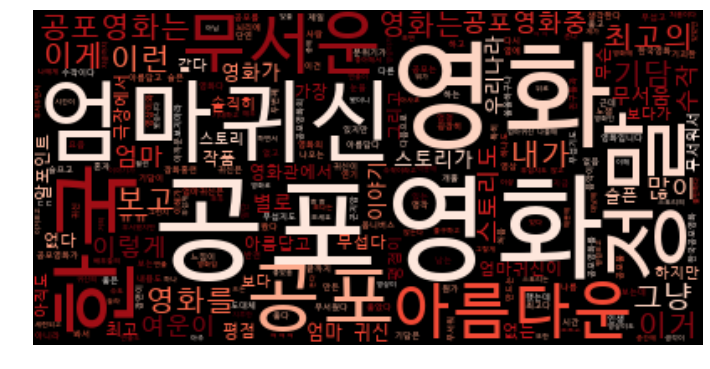

In [100]:
stopword = ['진짜', '너무', '봤는데']

wcloud = WordCloud('./data/D2Coding.ttf',
                   stopwords = stopword,
                   max_words=1000,
                   relative_scaling = 0.2,
                  background_color='black').generate(comment)
plt.figure(figsize=(12,12))
plt.imshow(wcloud.recolor(colormap='Reds_r'), interpolation='bilinear')
plt.axis("off")

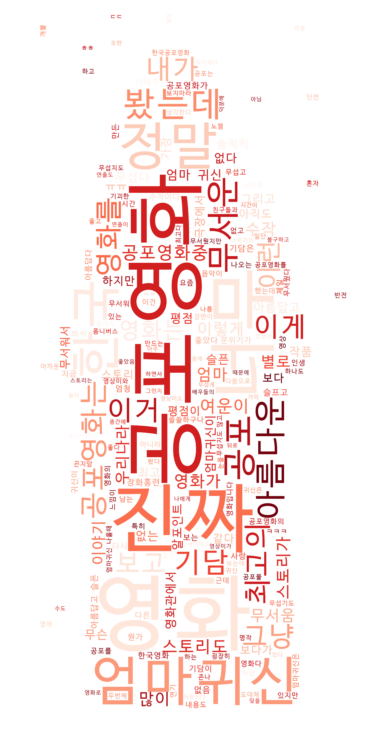

In [105]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.
# korea_coloring = np.array(Image.open("other masks/korea_mask.jpg"))
ghost = np.array(Image.open('./data/ghost.png'))
image_colors = ImageColorGenerator(ghost)
wcloud = WordCloud(font_path='./data/D2Coding.ttf', 
                       width=1600, height=1000, 
                       mask=ghost, 
                       background_color='white').generate(comment)
plt.figure(figsize=(10,10))
plt.imshow(wcloud.recolor(colormap="Reds_r"), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
# plt.imshow(wcloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# word_cloud.to_file("other_masks_applied.png")

In [ ]:
comment